<a href="https://colab.research.google.com/github/sbooeshaghi/BMGP_2020/blob/main/analysis/notebooks/hamming_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.special import comb
fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [31]:
def ham_bound(q, n, d):
  t = int(np.floor((d-1)/2))
  num = q**n
  den = np.sum([comb(n, k) *(q - 1)**k for k in range(0, t+1)])
  return int(num/den)

In [33]:
q = 4
bclen = 8
ham = 6
ham_bound(q, bclen, ham)

236

In [53]:
hams = np.arange(1, 5)
bc_lens = np.arange(8, 19)

data = np.zeros((len(bc_lens), len(hams)))

for i, bclen in enumerate(bc_lens):
  for j, ham in enumerate(hams):
    data[i, j] = ham_bound(q, bclen, ham)

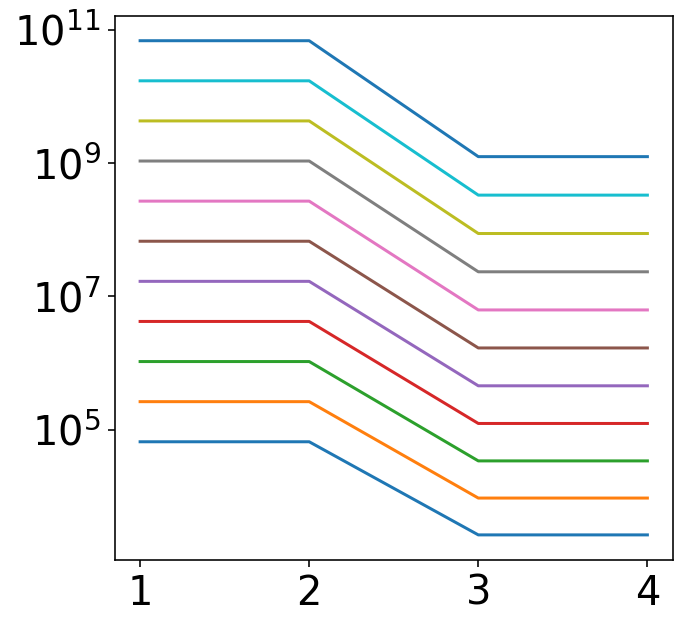

In [57]:
fig, ax = plt.subplots(figsize=(5,5))

for d in data:
  ax.plot(hams, d)

ax.set(**{
    "yscale": "log"
})
fig.show()

In [58]:

target_assays = [
                 "10xCRISPR",
                 "10xFB",
                 "clicktag",
                 "cellhash",
                 "multiseq",
                 "tapseq",
]


target_lengths = [
                  19,
                  15,
                  11,
                  12,
                  8,
                  19,
]

In [63]:
q = 4
ham = 4
for a, bclen in zip (target_assays, target_lengths):
  print(f"{a} \t\t{ham_bound(q, bclen, ham):,.0f}")

10xCRISPR 		4,739,274,257
10xFB 		23,342,213
clicktag 		123,361
cellhash 		453,438
multiseq 		2,621
tapseq 		4,739,274,257
